In [28]:
import numpy as np
from sklearn.linear_model import RANSACRegressor,LinearRegression
import matplotlib.pyplot as plt


In [29]:
x = np.load("X_train_regression2.npy")
y = np.load("y_train_regression2.npy")

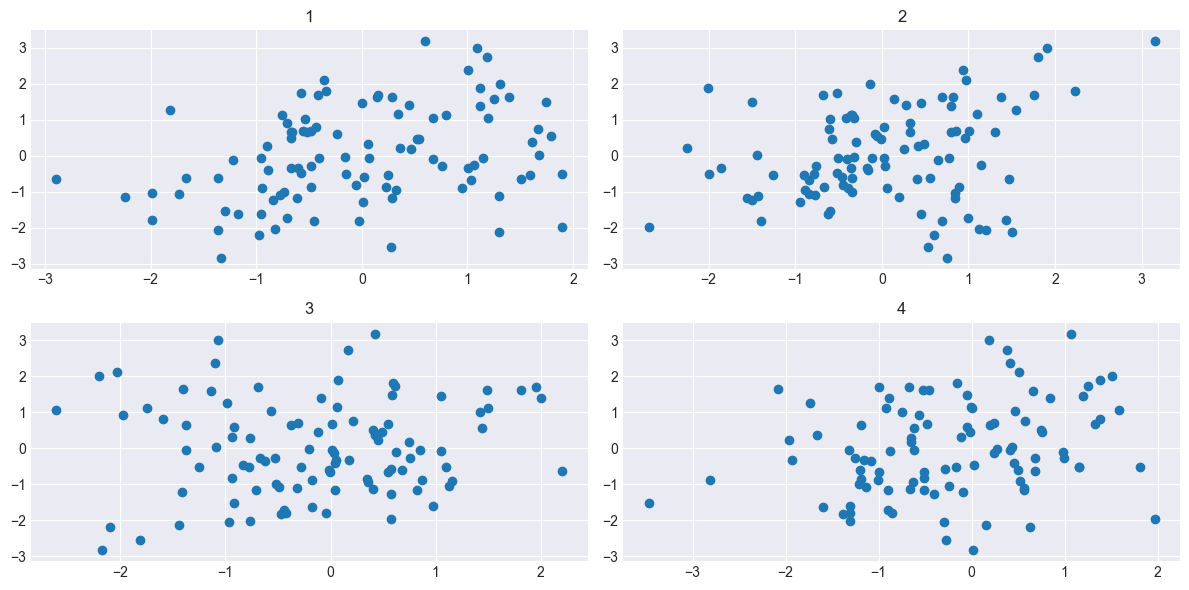

In [30]:
# Plot data
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Plot data on each subplot
axs[0, 0].scatter([row[0] for row in x], y.T[0])
axs[0, 0].set_title('1')

axs[0, 1].scatter([row[1] for row in x], y.T[0])
axs[0, 1].set_title('2')

axs[1, 0].scatter([row[2] for row in x], y.T[0])
axs[1, 0].set_title('3')

axs[1, 1].scatter([row[3] for row in x], y.T[0])
axs[1, 1].set_title('4')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [31]:
ransac = RANSACRegressor(estimator=LinearRegression(),random_state=1,max_trials=100000000,stop_probability=0.99999999)  

# Test for First Model
ransac.fit(x, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

Model1_x = x[inlier_mask]
Model1_y = y[inlier_mask]

# Test for Second Model

outliers_x = x[outlier_mask]
outliers_y = y[outlier_mask]

ransac.fit(outliers_x, outliers_y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

Model2_x = outliers_x[inlier_mask]
Model2_y = outliers_y[inlier_mask]

outliers_x = outliers_x[outlier_mask]
outliers_y = outliers_y[outlier_mask]


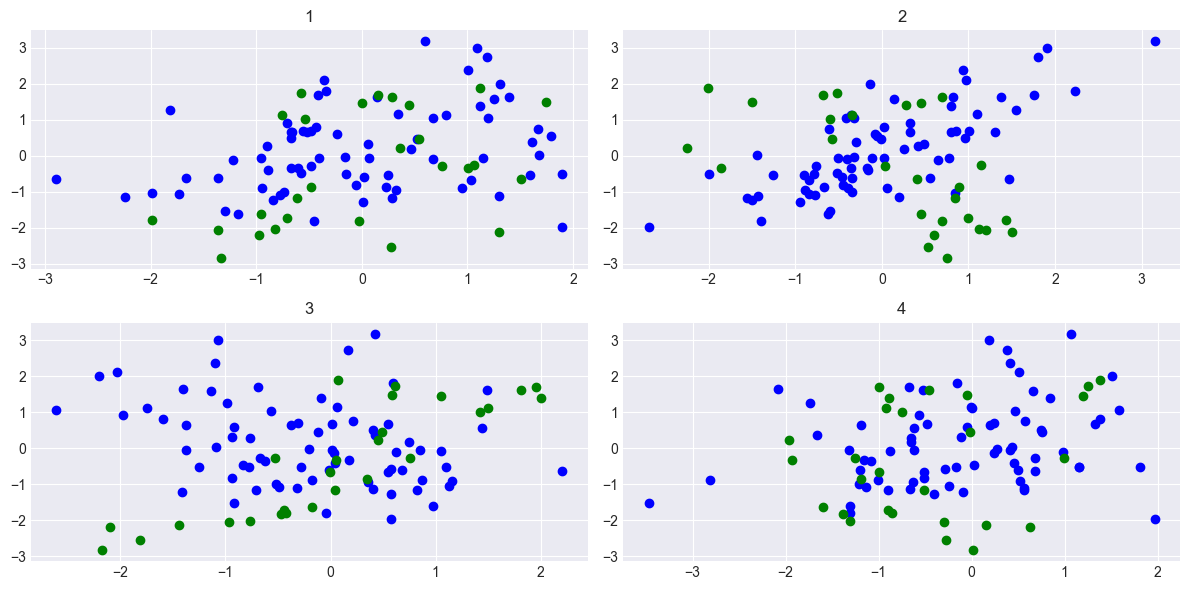

In [32]:
# Plot data
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Plot data on each subplot
axs[0, 0].scatter(Model1_x[:, 0], Model1_y, color='blue', label='Model1')
axs[0, 0].scatter(Model2_x[:, 0], Model2_y , color='green', label='Model2')
axs[0, 0].scatter(outliers_x[:, 0], outliers_y , color='red', label='Outliers')
axs[0, 0].set_title('1')

axs[0, 1].scatter(Model1_x[:, 1], Model1_y, color='blue', label='Model1')
axs[0, 1].scatter(Model2_x[:, 1], Model2_y, color='green', label='Model2')
axs[0, 1].scatter(outliers_x[:, 1], outliers_y , color='red', label='Outliers')
axs[0, 1].set_title('2')

axs[1, 0].scatter(Model1_x[:, 2], Model1_y, color='blue', label='Model1')
axs[1, 0].scatter(Model2_x[:, 2], Model2_y, color='green', label='Model2')
axs[1, 0].scatter(outliers_x[:, 2], outliers_y , color='red', label='Outliers')
axs[1, 0].set_title('3')

axs[1, 1].scatter(Model1_x[:, 3], Model1_y, color='blue', label='Model1')
axs[1, 1].scatter(Model2_x[:, 3], Model2_y, color='green', label='Model2')
axs[1, 1].scatter(outliers_x[:, 3], outliers_y , color='red', label='Outliers')
axs[1, 1].set_title('4')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [33]:
np.save("model1_x", Model1_x)
np.save("model1_y", Model1_y)
np.save("model2_x", Model2_x)
np.save("model2_y", Model2_y)

In [34]:
print(Model1_x.shape)
print(Model2_x.shape)

(73, 4)
(27, 4)
